In [96]:
import pandas as pd

In [97]:
import numpy as np

In [98]:
df = pd.read_csv('new_farud_no_label.csv')

In [99]:
df.head()

,Description,Amount
0,Purchased groceries online,50
1,Luxury watch purchase,1200
2,Booked flight tickets,500
3,International wire transfer,10000
4,Bought coffee at Starbucks,15


In [100]:
df.tail()

,Description,Amount
2301,Paid for a new pair of running shoes,750
2302,Purchased a luxury tea set,500
2303,Bought a high-quality rug,900
2304,Paid for a set of designer furniture,1100
2305,Bought a comfortable sofa cover,600


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  2306 non-null   object
 1   Amount       2306 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.2+ KB


In [102]:
df.describe()

,Amount
count,2306.000000
mean,4999.294449
std,5217.071111
min,5.000000
25%,60.000000
50%,6000.000000
75%,8500.000000
max,50000.000000


In [103]:
data = df.where(pd.notnull(df),'') # replace the null values with a null string
data.head()

,Description,Amount
0,Purchased groceries online,50
1,Luxury watch purchase,1200
2,Booked flight tickets,500
3,International wire transfer,10000
4,Bought coffee at Starbucks,15


In [104]:
df1 = df.isnull().sum()
df1

Description    0
Amount         0
dtype: int64

In [105]:
data.shape # provide the number of rows and columns

(2306, 2)

In [106]:
df['Label'] = df['Amount'].apply(lambda x: 1 if x > 5000 else 0) 
df.head()

,Description,Amount,Label
0,Purchased groceries online,50,0
1,Luxury watch purchase,1200,0
2,Booked flight tickets,500,0
3,International wire transfer,10000,1
4,Bought coffee at Starbucks,15,0


In [107]:
label = df['Label'].value_counts()
label

Label
1    1169
0    1137
Name: count, dtype: int64

In [121]:
df.shape

(2306, 3)

In [108]:
normal = round((label[0]/df['Label'].count()*100),2)
normal

49.31

In [109]:
fraud = round((label[1]/df['Label'].count()*100),2)
fraud

50.69

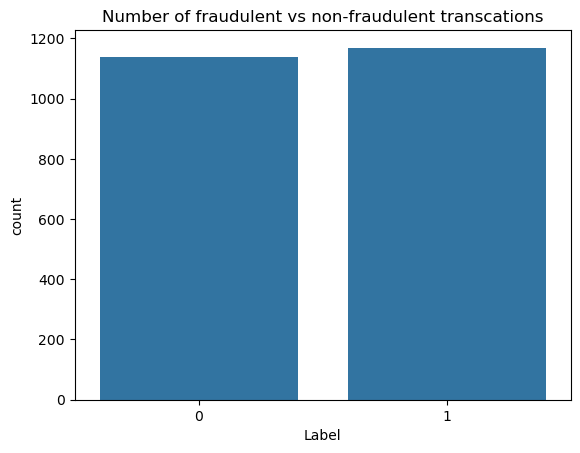

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(x='Label', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

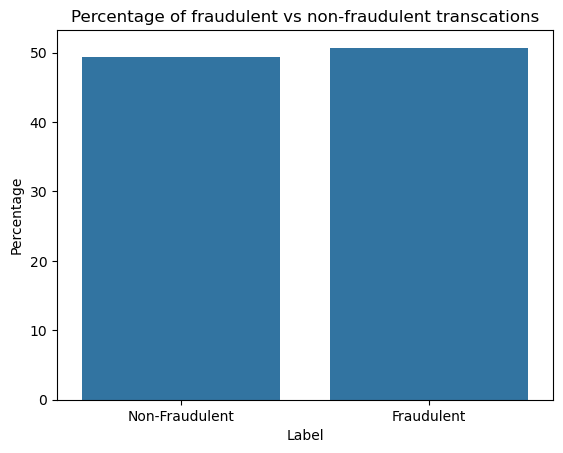

In [139]:
fraud_percentage = {'Label':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal, fraud]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Label',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [110]:
df.tail()

,Description,Amount,Label
2301,Paid for a new pair of running shoes,750,0
2302,Purchased a luxury tea set,500,0
2303,Bought a high-quality rug,900,0
2304,Paid for a set of designer furniture,1100,0
2305,Bought a comfortable sofa cover,600,0


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Description,df.Label)

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_count,y_train)

LogisticRegression()

In [114]:
descrip = [
    'Purchased luxury car',
    'Bought a sofa cover'
]
des = v.transform(descrip)

In [115]:
model.predict(des)

array([1, 0], dtype=int64)

In [116]:
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9133448873483535

In [117]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('vectorizer', CountVectorizer()),
               ('nb',LogisticRegression())
])

In [118]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb', LogisticRegression())])

In [119]:
clf.score(X_test,y_test)

0.9133448873483535

In [127]:
clf.predict(descrip)

array([1, 0], dtype=int64)